# Heart Disease Prediction using Neural Networks

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
cleveland = pd.read_csv(url, names=names)

In [ ]:
# print the shape of the DataFrame, so we can see how many examples we have
print ('format(cleveland.shape')
print (cleveland.loc[1])

format(cleveland.shape
age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
class           2
Name: 1, dtype: object


In [ ]:
# print the last twenty or so data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [ ]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [ ]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [ ]:
# print the shape and data type of the dataframe
print (data.shape)
print (data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [ ]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [ ]:
# print the shape and data type of the dataframe
print (data.shape)
print (data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


In [ ]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


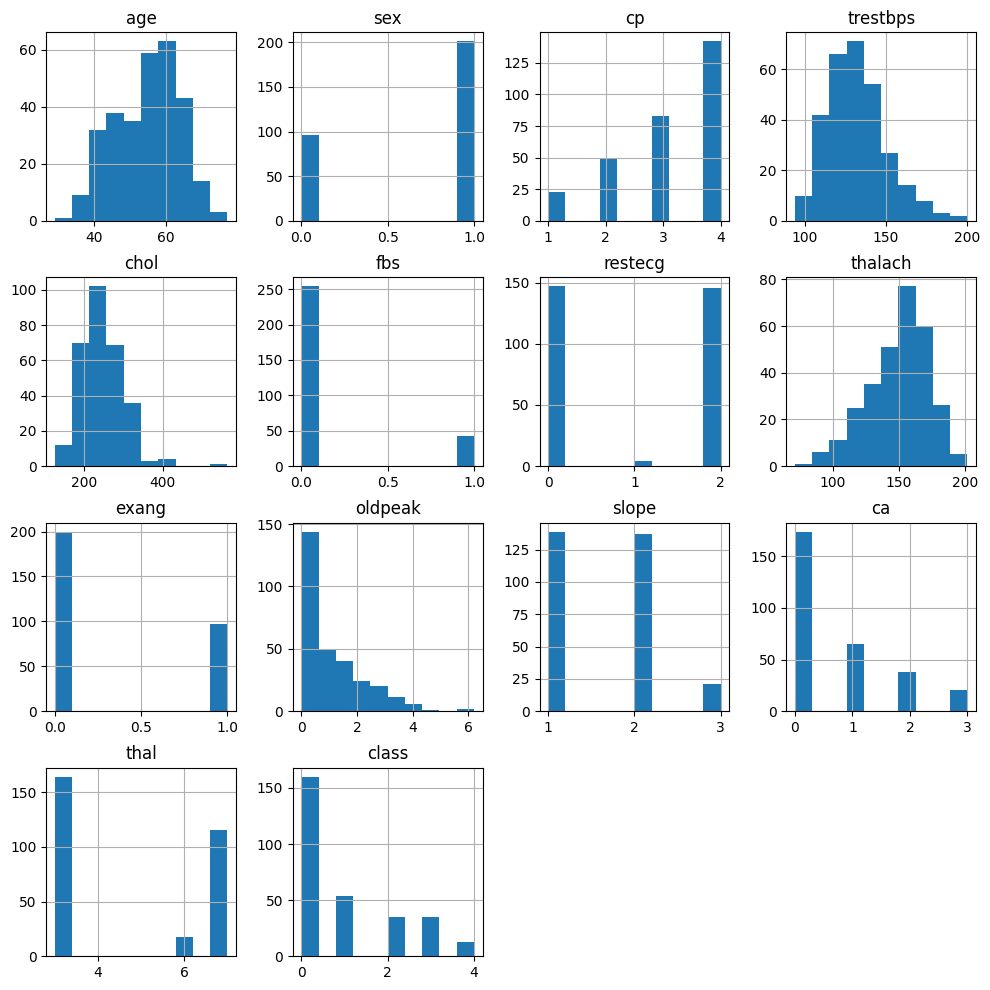

In [ ]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

### 2. Create Training and Testing Datasets

In [ ]:
from sklearn import model_selection
X = np.array(data.drop("class", axis=1))
y = np.array(data["class"])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

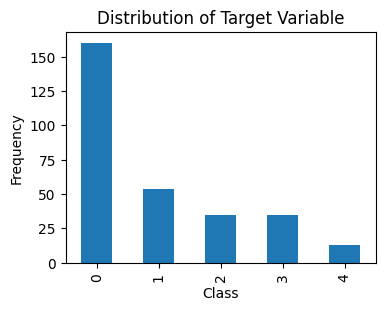

In [ ]:
# Assuming y is a numpy array, convert it to a pandas Series
y_series = pd.Series(y)

# Calculate value counts of the target variable
class_counts = y_series.value_counts().sort_index()

# Plotting the distribution of the target variable
plt.figure(figsize=(4, 3))
class_counts.plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!pip install --upgrade keras tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fou

In [ ]:
# convert the data to categorical labels
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(237, 5)
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


### 3. Building and Training the Neural Network

Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Training the model
history = model.fit(X_train, Y_train, epochs=150, batch_size=10, validation_data=(X_test, Y_test), verbose=1)


Epoch 1/150
24/24 [==============================] - 1s 14ms/step - loss: 1.4343 - accuracy: 0.5696 - val_loss: 1.5708 - val_accuracy: 0.4167
Epoch 2/150
24/24 [==============================] - 0s 4ms/step - loss: 1.3248 - accuracy: 0.5696 - val_loss: 1.5217 - val_accuracy: 0.4167
Epoch 3/150
24/24 [==============================] - 0s 4ms/step - loss: 1.2893 - accuracy: 0.5696 - val_loss: 1.5302 - val_accuracy: 0.4167
Epoch 4/150
24/24 [==============================] - 0s 4ms/step - loss: 1.2540 - accuracy: 0.5696 - val_loss: 1.4603 - val_accuracy: 0.4167
Epoch 5/150
24/24 [==============================] - 0s 4ms/step - loss: 1.2339 - accuracy: 0.5696 - val_loss: 1.4620 - val_accuracy: 0.4167
Epoch 6/150
24/24 [==============================] - 0s 4ms/step - loss: 1.2073 - accuracy: 0.5696 - val_loss: 1.4250 - val_accuracy: 0.4167
Epoch 7/150
24/24 [==============================] - 0s 4ms/step - loss: 1.1842 - accuracy: 0.5696 - val_loss: 1.4249 - val_accuracy: 0.4167
Epoch 8/150


In [ ]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Accuracy: {accuracy:.2f}')


2/2 [==============================] - 0s 7ms/step - loss: 1.0152 - accuracy: 0.5667
Accuracy: 0.57


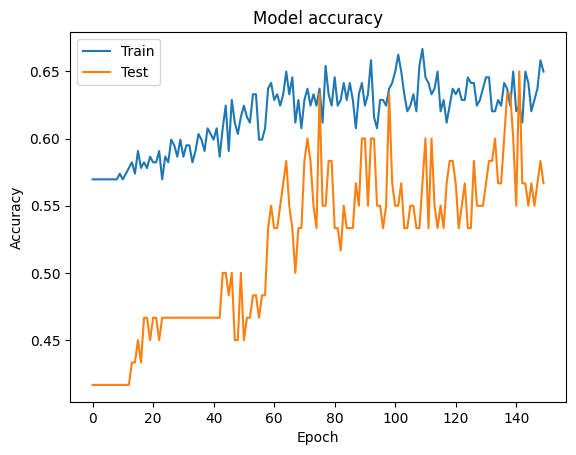

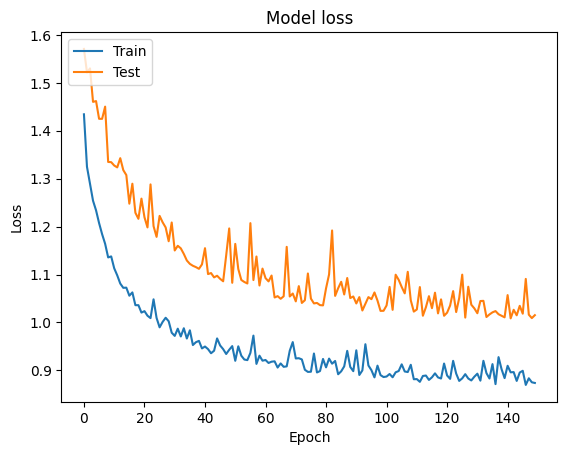

In [ ]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### 4. Improving Results - A Binary Classification Problem

Although we achieved promising results, we still have a fairly large error. This could be because it is very difficult to distinguish between the different severity levels of heart disease (classes 1 - 4). Let's simplify the problem by converting the data to a binary classification problem - heart disease or no heart disease.

In [ ]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1]


In [ ]:
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5240 - loss: 0.7111
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5037 - loss: 0.6986 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5286 - loss: 0.6740 
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6075 - loss: 0.6740 
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5651 - loss: 0.6673 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7102 - loss: 0.6629  
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5850 - loss: 0.6642 
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - loss: 0.6384 
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6885 - loss: 0.6634 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6244 - loss: 0.6445 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6804 - loss: 0.6442 
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

### 5. Results and Metrics

The accuracy results we have been seeing are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility.

Let's test the performance of both our categorical model and binary model.  To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

In [ ]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Results for Categorical Model
0.5833333333333334
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        38
           1       0.00      0.00      0.00         9
           2       0.09      0.50      0.15         2
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1

    accuracy                           0.58        60
   macro avg       0.18      0.28      0.20        60
weighted avg       0.52      0.58      0.54        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


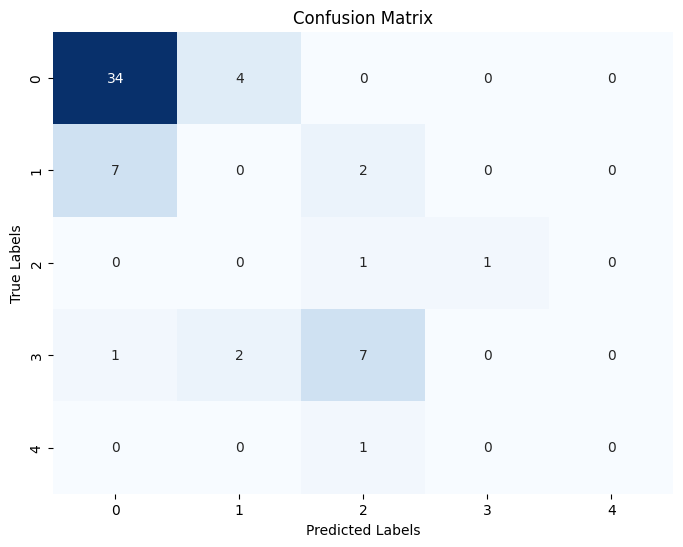

In [ ]:
# Assuming categorical_pred and y_test are defined
categorical_pred = np.argmax(model.predict(X_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, categorical_pred)

# Optional: Normalize the confusion matrix by row (i.e., by the number of samples in each class)
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Results for Binary Model
0.85
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.78      0.82      0.80        22

    accuracy                           0.85        60
   macro avg       0.84      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



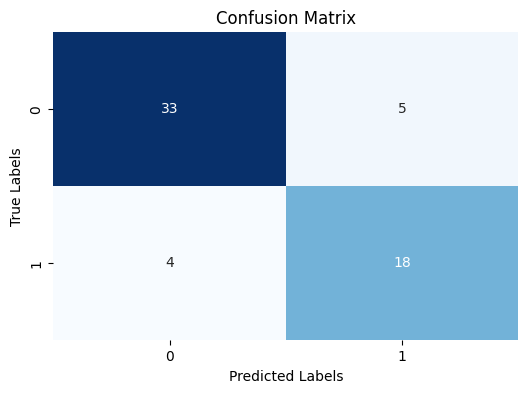

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test_binary, binary_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_logreg = logreg_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier()

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)


3. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)


4. Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC

# Initialize the model
svc_model = SVC()

# Fit the model on the training data
svc_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svc = svc_model.predict(X_test)


5. K-Nearest Neighbors Classifier (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier()

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)


Evaluating Models

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'Logistic Regression Accuracy: {accuracy_logreg:.2f}')
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Support Vector Classifier Accuracy: {accuracy_svc:.2f}')
print(f'K-Nearest Neighbors Classifier Accuracy: {accuracy_knn:.2f}')


Logistic Regression Accuracy: 0.58
Decision Tree Accuracy: 0.63
Random Forest Accuracy: 0.68
Support Vector Classifier Accuracy: 0.63
K-Nearest Neighbors Classifier Accuracy: 0.58


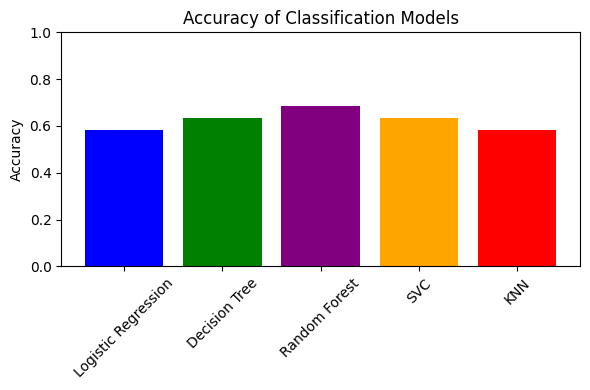

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary of accuracies
accuracies = {
    'Logistic Regression': accuracy_logreg,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'SVC': accuracy_svc,
    'KNN': accuracy_knn
}

# Plot accuracies
plt.figure(figsize=(6, 4))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'purple', 'orange', 'red'])
plt.ylim(0.0, 1.0)  # Set y-axis limits from 0 to 1
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
